In [41]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab

In [2]:
df = pd.read_csv('heart_study.csv')

In [3]:
df.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

# we need to predict if the individual will get heart disease within the next ten years

In [4]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
df = df.rename(columns={'male': 'sex_male'})
df.head()

,sex_male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [11]:
corr1 = df[['education', 'TenYearCHD']].corr()
print(corr1)
corr2 = df[['glucose','TenYearCHD']].corr()
print(corr2)
corr3 = df[['heartRate','TenYearCHD']].corr()
print(corr3)
corr4 = df[['prevalentStroke','TenYearCHD']].corr()
print(corr4)

            education  TenYearCHD
education    1.000000   -0.054248
TenYearCHD  -0.054248    1.000000
            glucose  TenYearCHD
glucose     1.00000     0.12559
TenYearCHD  0.12559     1.00000
            heartRate  TenYearCHD
heartRate    1.000000    0.022907
TenYearCHD   0.022907    1.000000
                 prevalentStroke  TenYearCHD
prevalentStroke         1.000000    0.061823
TenYearCHD              0.061823    1.000000


In [9]:
df.corr()

,sex_male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
sex_male,1.000000,-0.029014,0.017415,0.197026,0.317143,-0.052504,-0.004550,0.005853,0.015693,-0.070413,-0.035879,0.058199,0.081871,-0.116932,0.005979,0.088374
age,-0.029014,1.000000,-0.166356,-0.213662,-0.192959,0.123052,0.057679,0.306799,0.101314,0.262554,0.394053,0.205586,0.136096,-0.012843,0.122356,0.225408
education,0.017415,-0.166356,1.000000,0.018528,0.008323,-0.010898,-0.035142,-0.081726,-0.038749,-0.023613,-0.129496,-0.061919,-0.137747,-0.054182,-0.035843,-0.054248
currentSmoker,0.197026,-0.213662,0.018528,1.000000,0.769774,-0.048927,-0.032980,-0.103710,-0.044285,-0.046488,-0.130281,-0.107933,-0.167857,0.062686,-0.056726,0.019448
cigsPerDay,0.317143,-0.192959,0.008323,0.769774,1.000000,-0.046155,-0.032711,-0.066645,-0.037089,-0.026479,-0.088797,-0.056715,-0.093293,0.075564,-0.058886,0.057755
BPMeds,-0.052504,0.123052,-0.010898,-0.048927,-0.046155,1.000000,0.117370,0.261067,0.052060,0.080623,0.254194,0.194122,0.100702,0.015230,0.051197,0.087519
prevalentStroke,-0.004550,0.057679,-0.035142,-0.032980,-0.032711,0.117370,1.000000,0.074791,0.006955,0.000105,0.057000,0.045153,0.025909,-0.017674,0.018440,0.061823
prevalentHyp,0.005853,0.306799,-0.081726,-0.103710,-0.066645,0.261067,0.074791,1.000000,0.077752,0.163632,0.696656,0.615840,0.301344,0.146815,0.086656,0.177458
diabetes,0.015693,0.101314,-0.038749,-0.044285,-0.037089,0.052060,0.006955,0.077752,1.000000,0.040348,0.111265,0.050260,0.087068,0.048986,0.617630,0.097344
totChol,-0.070413,0.262554,-0.023613,-0.046488,-0.026479,0.080623,0.000105,0.163632,0.040348,1.000000,0.208734,0.164698,0.115992,0.091127,0.046538,0.082369


In [16]:
df1 = df.drop(['education','glucose'],axis=1)

In [17]:
df1.isna().sum()

sex_male            0
age                 0
currentSmoker       0
cigsPerDay         29
BPMeds             53
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol            50
sysBP               0
diaBP               0
BMI                19
heartRate           1
TenYearCHD          0
dtype: int64

In [23]:
df1['cigsPerDay'].fillna(df1['cigsPerDay'].mean(), inplace=True)

In [24]:
df1['BPMeds'].fillna(df1['BPMeds'].mode()[0], inplace=True)

In [25]:
df1['totChol'].fillna(df1['totChol'].mean(), inplace=True)

In [26]:
df1['BMI'].fillna(df1['BMI'].mean(),inplace=True)

In [27]:
df1['heartRate'].fillna(df1['heartRate'].mean(),inplace=True)

In [28]:
df1.isna().sum()

sex_male           0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
TenYearCHD         0
dtype: int64

In [29]:
df1.corr()

,sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,TenYearCHD
sex_male,1.000000,-0.029014,0.197026,0.316023,-0.051544,-0.004550,0.005853,0.015693,-0.070064,-0.035879,0.058199,0.081705,-0.116913,0.088374
age,-0.029014,1.000000,-0.213662,-0.192534,0.121011,0.057679,0.306799,0.101314,0.260691,0.394053,0.205586,0.135578,-0.012839,0.225408
currentSmoker,0.197026,-0.213662,1.000000,0.767055,-0.048348,-0.032980,-0.103710,-0.044285,-0.046211,-0.130281,-0.107933,-0.167483,0.062678,0.019448
cigsPerDay,0.316023,-0.192534,0.767055,1.000000,-0.045684,-0.032711,-0.066444,-0.037086,-0.026182,-0.088523,-0.056473,-0.092888,0.075257,0.057646
BPMeds,-0.051544,0.121011,-0.048348,-0.045684,1.000000,0.114614,0.258580,0.051407,0.078775,0.251479,0.192254,0.099681,0.015136,0.086448
prevalentStroke,-0.004550,0.057679,-0.032980,-0.032711,0.114614,1.000000,0.074791,0.006955,0.000105,0.057000,0.045153,0.024856,-0.017674,0.061823
prevalentHyp,0.005853,0.306799,-0.103710,-0.066444,0.258580,0.074791,1.000000,0.077752,0.162683,0.696656,0.615840,0.300599,0.146777,0.177458
diabetes,0.015693,0.101314,-0.044285,-0.037086,0.051407,0.006955,0.077752,1.000000,0.040161,0.111265,0.050260,0.086282,0.048986,0.097344
totChol,-0.070064,0.260691,-0.046211,-0.026182,0.078775,0.000105,0.162683,0.040161,1.000000,0.207436,0.163423,0.115013,0.090678,0.081807
sysBP,-0.035879,0.394053,-0.130281,-0.088523,0.251479,0.057000,0.696656,0.111265,0.207436,1.000000,0.783952,0.325172,0.182084,0.216374


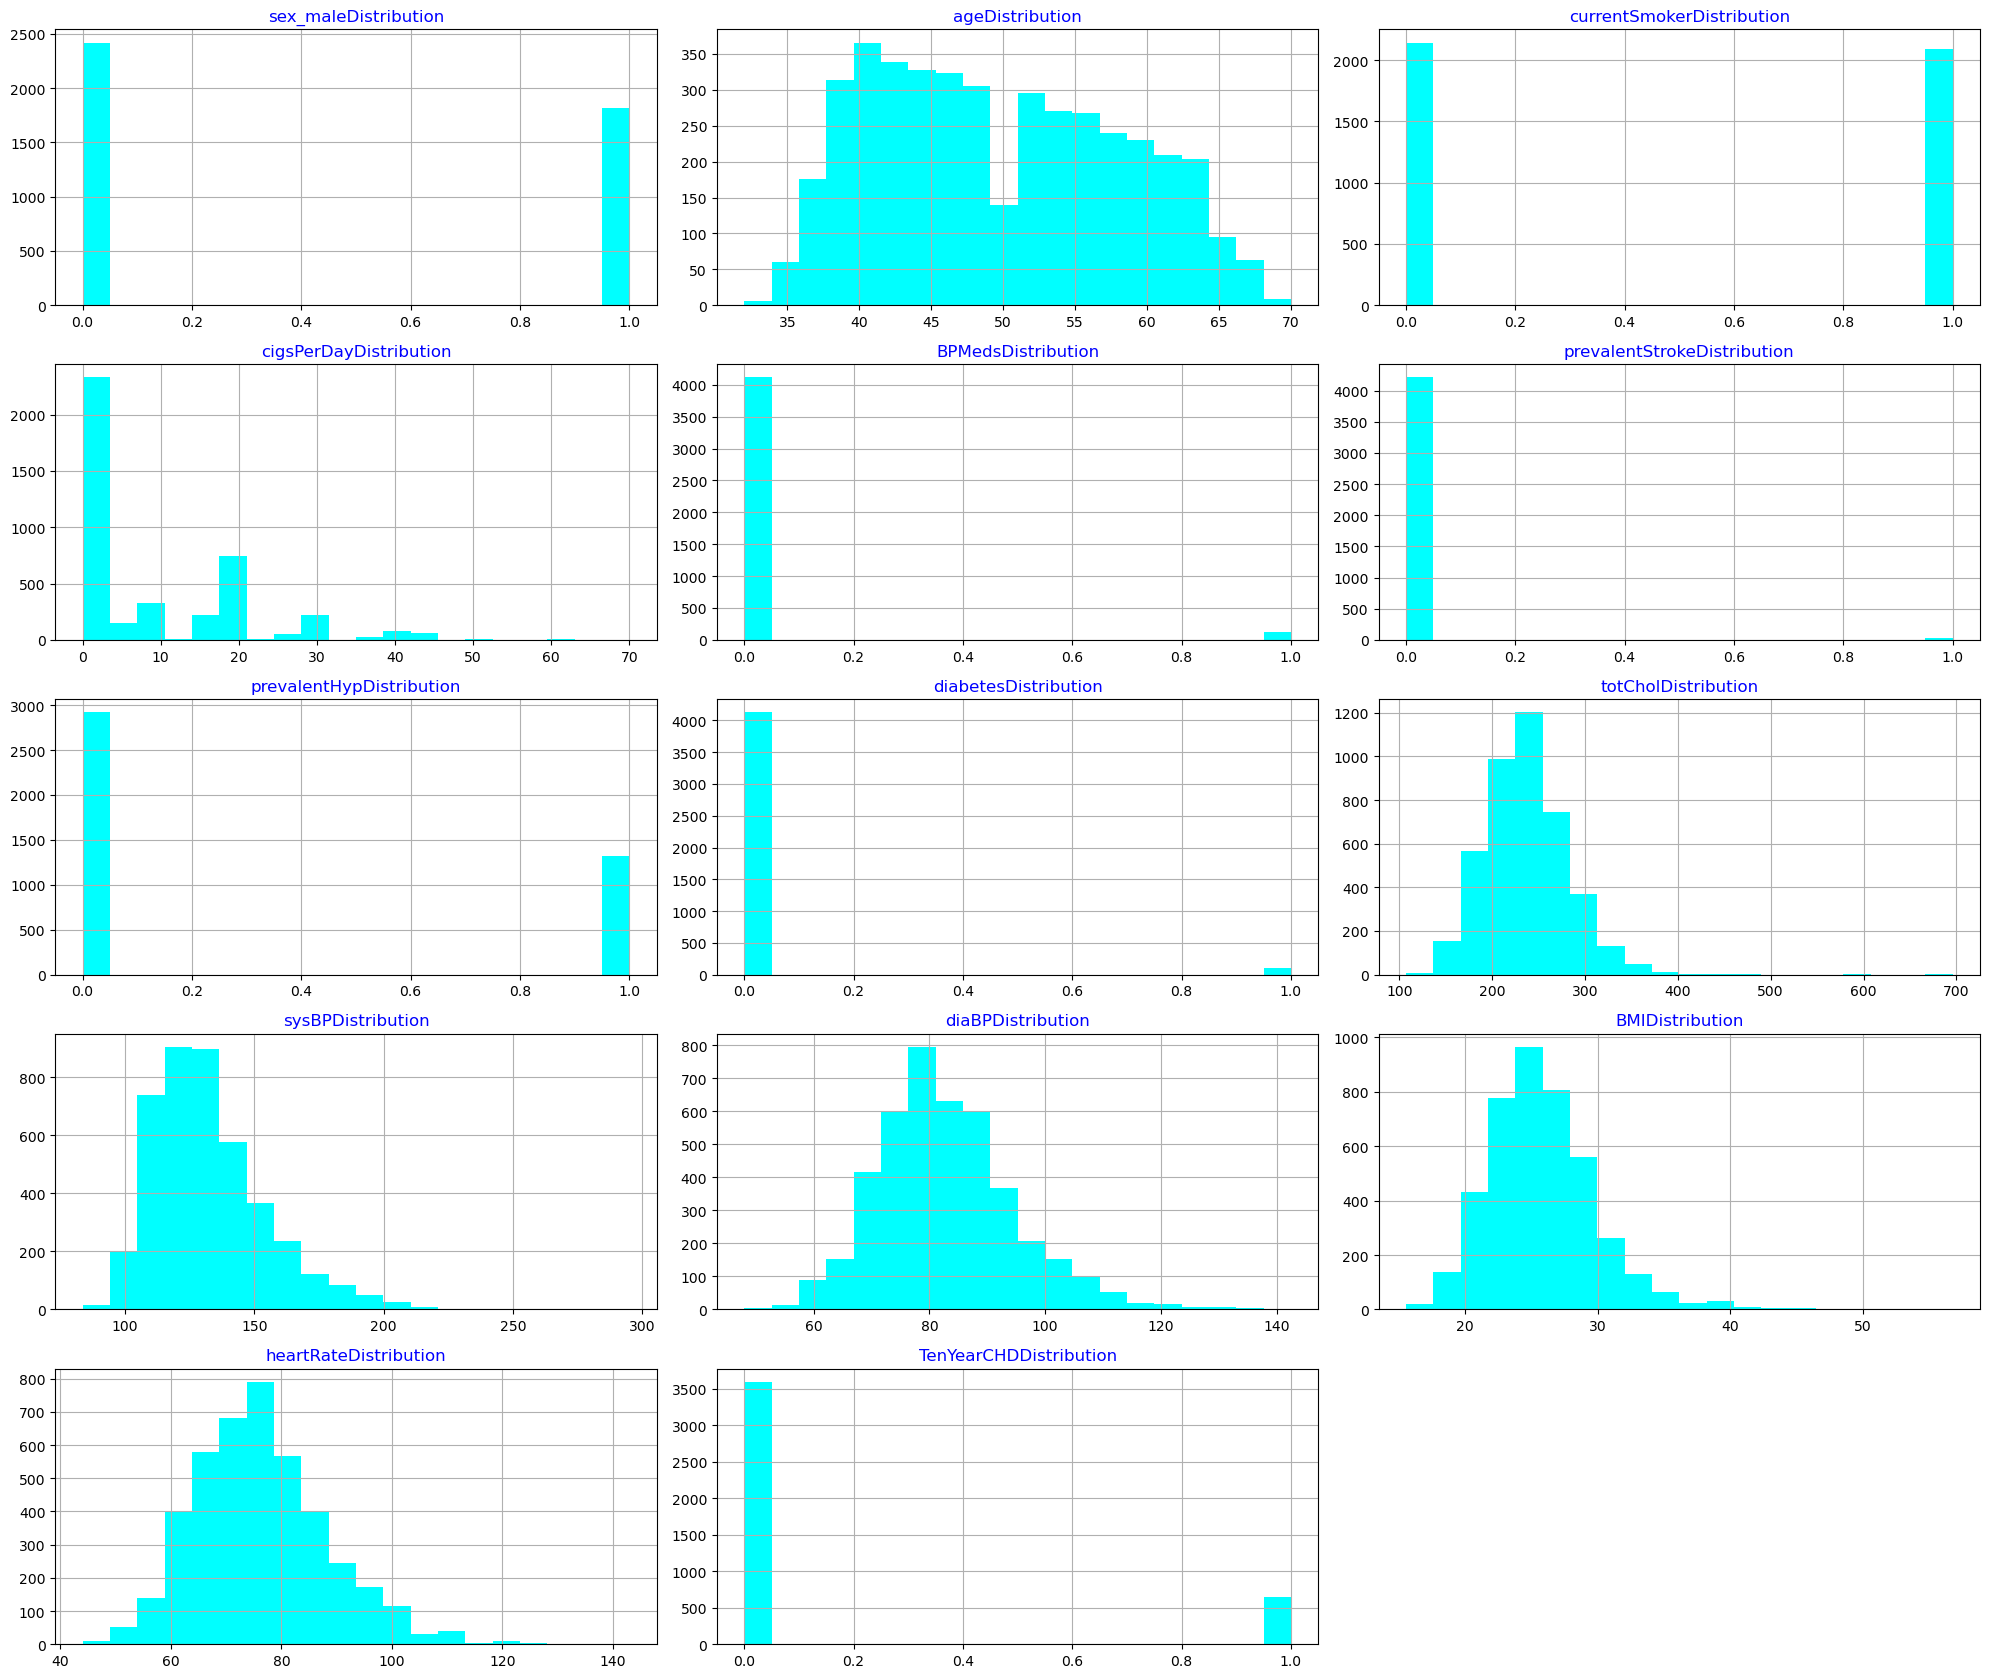

In [31]:
def draw_histograms(df1, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        df1[feature].hist(bins=20,ax=ax,facecolor='aqua')
        ax.set_title(feature+"Distribution", color='blue')
    fig.tight_layout()
    plt.show()
draw_histograms(df1, df1.columns, 6, 3)

In [32]:
# the 0 and 1 shows that the feature is categorical that is either yes or no // true of false 

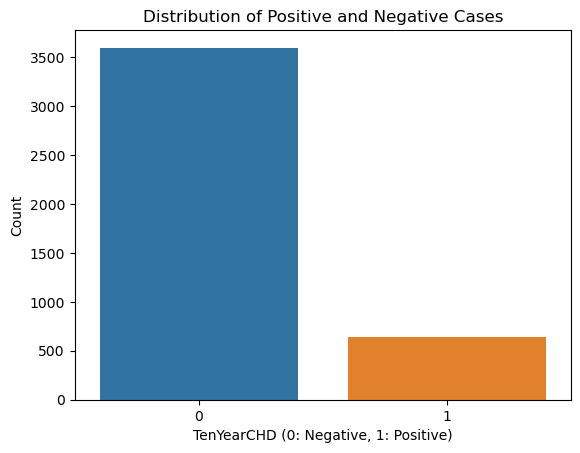

In [38]:
sn.countplot(x='TenYearCHD', data=df1)
plt.title('Distribution of Positive and Negative Cases')
plt.xlabel('TenYearCHD (0: Negative, 1: Positive)')
plt.ylabel('Count')
plt.show()

In [39]:
count_values = df1['TenYearCHD'].value_counts()
print("Positive Cases (1):", count_values[1])
print("Negative Cases (0):", count_values[0])

Positive Cases (1): 644
Negative Cases (0): 3596


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [72]:
X = df1.drop('TenYearCHD', axis=1) 
y = df1['TenYearCHD']  

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8584905660377359
Confusion Matrix:
 [[723   2]
 [118   5]]


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
from statsmodels.tools import add_constant as add_constant
df_constant = add_constant(df1)
df_constant.head()

,const,sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,TenYearCHD
0,1.0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,0
1,1.0,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,0
2,1.0,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,0
3,1.0,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,1
4,1.0,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,0


In [48]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df1)
cols = df_constant.columns[:-1]
model = sm.Logit(df1.TenYearCHD, df_constant[cols])
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.379709
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4226
Method:                           MLE   Df Model:                           13
Date:                Sun, 03 Dec 2023   Pseudo R-squ.:                  0.1086
Time:                        13:25:01   Log-Likelihood:                -1610.0
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 9.574e-76
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.7449      0.626    -12.365      0.000      -8.973      -6.517
sex_male            0.5119      0.100      5.112      0.000       0.316       0.708
age                 0.0627      0.006     10.169      0.000       0.051       0.075
currentSmoker       0.0160      0.144      0.111      0.912      -0.266       0.298
cigsPerDay          0.0207      0.006      3.628      0.000       0.010       0.032
BPMeds              0.2374      0.219      1.085      0.278      -0.192       0.666
prevalentStroke     0.9916      0.441      2.248      0.025       0.127       1.856
prevalentHyp        0.2205      0.128      1.720      0.085      -0.031       0.472
diabetes            0.7725      0.219      3.533      0.000       0.344       1.201
totChol             0.0018      0.001      1.781      0.075      -0.000       0.004
sysBP               0.0148      0.004      4.214      0.000       0.008       0.022
diaBP              -0.0038      0.006     -0.633      0.527      -0.015       0.008
BMI                 0.0042      0.012      0.359      0.719      -0.019       0.027
heartRate          -0.0005      0.004     -0.134      0.893      -0.008       0.007
===================================================================================
"""

In [49]:
def back_feature_elem (df1, dep_var, col_list):
    while len(col_list)>0 :
        model = sm.Logit(dep_var,df1[col_list])
        result = model.fit(disp=0)
        largest_pvalue = round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list = col_list.drop(largest_pvalue.index)
result = back_feature_elem(df_constant, df1.TenYearCHD, cols)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4233
Method:                           MLE   Df Model:                            6
Date:                Sun, 03 Dec 2023   Pseudo R-squ.:                  0.1063
Time:                        13:27:43   Log-Likelihood:                -1614.1
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 7.480e-80
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.9005      0.372    -21.230      0.000      -8.630      -7.171
sex_male            0.4848      0.097      4.999      0.000       0.295       0.675
age                 0.0650      0.006     10.985      0.000       0.053       0.077
cigsPerDay          0.0212      0.004      5.513      0.000       0.014       0.029
prevalentStroke     1.0687      0.436      2.449      0.014       0.213       1.924
diabetes            0.7937      0.217      3.660      0.000       0.369       1.219
sysBP               0.0173      0.002      8.664      0.000       0.013       0.021
===================================================================================
"""

In [50]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue = round(result.pvalues,3)
conf['pvalue'] = pvalue
conf.columns = ['CI 95%(2.5%)','CI 95%(97.5%)', 'Odds Ratio', 'pvalue']
print((conf))

                 CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const                0.000179       0.000768    0.000371   0.000
sex_male             1.342792       1.963893    1.623915   0.000
age                  1.054868       1.079628    1.067177   0.000
cigsPerDay           1.013739       1.029117    1.021399   0.000
prevalentStroke      1.237931       6.847906    2.911569   0.014
diabetes             1.445885       3.382922    2.211632   0.000
sysBP                1.013462       1.021418    1.017432   0.000


In [54]:
from sklearn.linear_model import LogisticRegression
selected_columns = ['sex_male', 'age', 'cigsPerDay', 'prevalentStroke', 'diabetes', 'sysBP', 'TenYearCHD']
df2 = df[selected_columns]
X = df2.drop('TenYearCHD', axis=1)
y = df2['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.8525943396226415


In [57]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", conf_matrix)

Confusion Matrix: 
 [[718   7]
 [118   5]]


In [60]:
Tp = conf_matrix[0][0]
Fn = conf_matrix[0][1]
Fp = conf_matrix[1][0]
Tn = conf_matrix[1][1]

In [61]:
Tp

718

In [62]:
Fn

7

In [63]:
Fp

118

In [64]:
Tn

5

In [65]:
accuracy = (Tp + Tn) / (Tp + Tn + Fp + Fn)
accuracy

0.8525943396226415

In [68]:
precision = Tp / (Tp + Fp)
precision

0.8588516746411483

In [70]:
recall = Tp / (Tp + Fn)
recall

0.9903448275862069

In [73]:
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

accuracy = (TP + TN) / (TP + TN + FP + FN)

precision = TP / (TP + FP)

recall = TP / (TP + FN)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8584905660377359
Precision: 0.7142857142857143
Recall: 0.04065040650406504


In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       725
           1       0.71      0.04      0.08       123

    accuracy                           0.86       848
   macro avg       0.79      0.52      0.50       848
weighted avg       0.84      0.86      0.80       848

